# Classification Review
# Clustering Review


# Introduction to Logistic Regression

## Logistic Regression is a statistical method used for binary classification.
## In Classification  task  the goal is to categorize input data points into predefined classes or labels.
## It predicts the probability of an event occurring based on one or more predictor variables.
## Despite its name, it's used for classification rather than regression problems.
## Developed in the early 20th century by statistician David Cox in 1958.
## Extension of linear regression for binary outcomes.
## Originally known as the logistic function, later popularized as logistic regression.

## Example Application: 
### Predicting the likelihood of a patient having a specific disease based on various medical test results.
### Predicting whether a customer will purchase a product based on historical data and customer attributes.
### Predicting the probability of loan default based on financial indicators.

## Classification Models
### Logistic Regression ( LR)
#### ( The following will be reviewed after we discuss ML next week)
### Classification and Regression Tree ( CART) or Decision Tree
### Random Forest (RF)
### K Nearly Neighbours ( KNN)

# Classification with Logistic Regression

## Logirtic Regression used to fit a curve to data in which the dependent variable is binary, or dichotomous.

## Given some event with probability p of being 1, the odds of that event are given by: 

$$ \bf\Large Odds  =\dfrac{p}{1-p}$$
$$\Large \bf \ln (odds) = mx +b$$

$\Large \bf p = \dfrac{e^{mx+b}}{1+e^{mx+b}}= \dfrac{1}{1+e^{-(mx+b)}}$

## Confusion Matrix

 ### A common method for describing the performance of a classification model consisting of true positives, true
 
 ### negatives, false positives, and false negatives. It is called a confusion matrix because it shows how confused
 
 ### the model is between the classes.

## True Positive (TP): Predicted positive and actually positive.
## True Negative (TN): Predicted negative and actually negative.
## False Positive (FP): Predicted positive but actually negative.
## False Negative (FN): Predicted negative but actually positive.

## Measuring the Logistic Regression

$$\bf \large Accuracy= \dfrac{TP+TN}{TP + TN +FP+FN}$$

* Measures the overall correctness of the model. However, accuracy can be misleading in imbalanced datasets.
* In imbalanced datasets, a classifier can achieve high accuracy by simply predicting the majority class most of the time.
* For instance, if 90% of instances belong to the negative class, a classifier that predicts all instances as negative would still achieve 90% accuracy.
* This can give a false sense of good performance because the model may not be effectively capturing the minority class, which is often the more critical or interesting class in many applications (e.g., detecting fraud, rare diseases).

## Other Metrics
### Precision (Positive Predictions Accuracy)
$$\bf \Large Precision= \dfrac{TP}{TP + FP}$$
* Focuses on the accuracy of positive predictions.
* Lowers when there are many false positives.
### Recall (Sensitivity or True Positive Rate)

$$ \Large \bf Recall = \dfrac{TP}{TP+FN}$$
* Measures the ability to capture all positive instances.
* Lowers when there are many false negatives.

## Area Under the Receiver Operating Characteristic (ROC) Curve (AUC-ROC)

* ROC Curve plots the True Positive Rate against the False Positive Rate at various threshold settings.
* AUC-ROC measures the area under the ROC curve ( 0-1), providing a single value to assess the model's discriminatory power.

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
#print(bank_marketing.metadata) 
  
# variable information 
#print(bank_marketing.variables) 

In [3]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [4]:
X.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [6]:
import pandas as pd
cc = pd.read_csv("creditcards.txt", sep='\t')
cc.head()

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
0,1,30.83,0.000,1.25,1,0,1,1,202,0,1
1,0,58.67,4.460,3.04,1,0,6,1,43,560,1
2,0,24.50,0.500,1.50,1,1,0,1,280,824,1
3,1,27.83,1.540,3.75,1,0,5,0,100,3,1
4,1,20.17,5.625,1.71,1,1,0,1,120,0,1


In [7]:
cc.isna().sum().sum()

0

In [8]:
cc.columns

Index(['A1', 'A2', 'A3', 'A8', 'A9', 'A10', 'A11', 'A12', 'A14', 'A15', 'R1'], dtype='object')

In [9]:
import statsmodels.formula.api as smf
model1 = smf.logit(formula= 'R1 ~ A1 + A2 + A3 + A8 + A9+ A10 + A11+ A12+ A14+ A15', data = cc).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.320313
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     R1   No. Observations:                  654
Model:                          Logit   Df Residuals:                      643
Method:                           MLE   Df Model:                           10
Date:                Sat, 27 Jan 2024   Pseudo R-squ.:                  0.5349
Time:                        22:56:20   Log-Likelihood:                -209.48
converged:                       True   LL-Null:                       -450.38
Covariance Type:            nonrobust   LLR p-value:                 3.444e-97
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3169      0.551     -4.202      0.000      -3.398      -1.236
A1             0.0058      0.

In [10]:
cc.R1

0      1
1      1
2      1
3      1
4      1
      ..
649    0
650    0
651    0
652    0
653    0
Name: R1, Length: 654, dtype: int64

In [11]:
# Prediction 
R1pred = model1.predict()
R1pred[:5]

array([0.75664308, 0.87516974, 0.71167559, 0.86832399, 0.6508202 ])

In [12]:
cc["R1pred"] = (R1pred >= 0.5).astype(int)
cc.head()

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1,R1pred
0,1,30.83,0.000,1.25,1,0,1,1,202,0,1,1
1,0,58.67,4.460,3.04,1,0,6,1,43,560,1,1
2,0,24.50,0.500,1.50,1,1,0,1,280,824,1,1
3,1,27.83,1.540,3.75,1,0,5,0,100,3,1,1
4,1,20.17,5.625,1.71,1,1,0,1,120,0,1,1


In [13]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(cc['R1'], cc['R1pred'])
print("Accuracy Score:", accuracy_score(cc['R1'], cc['R1pred']))
print("Confusion Matrix:")
print(conf_matrix)

Accuracy Score: 0.863914373088685
Confusion Matrix:
[[292  66]
 [ 23 273]]


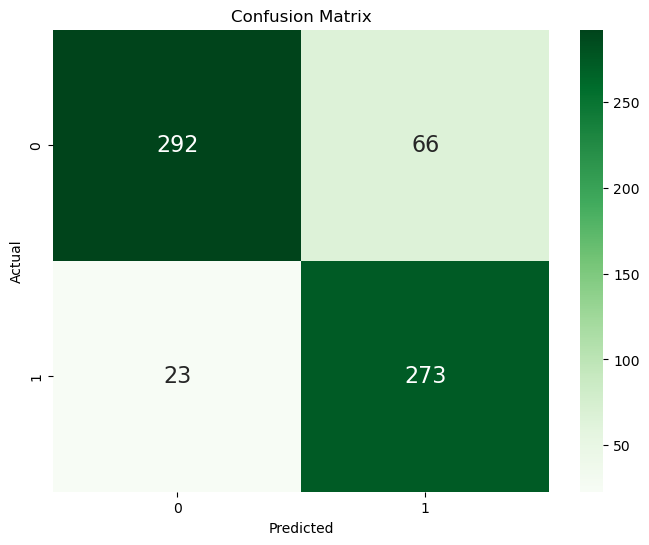

In [14]:
# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# Classification Report
class_report = classification_report(cc['R1'], cc['R1pred'])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       358
           1       0.81      0.92      0.86       296

    accuracy                           0.86       654
   macro avg       0.87      0.87      0.86       654
weighted avg       0.87      0.86      0.86       654



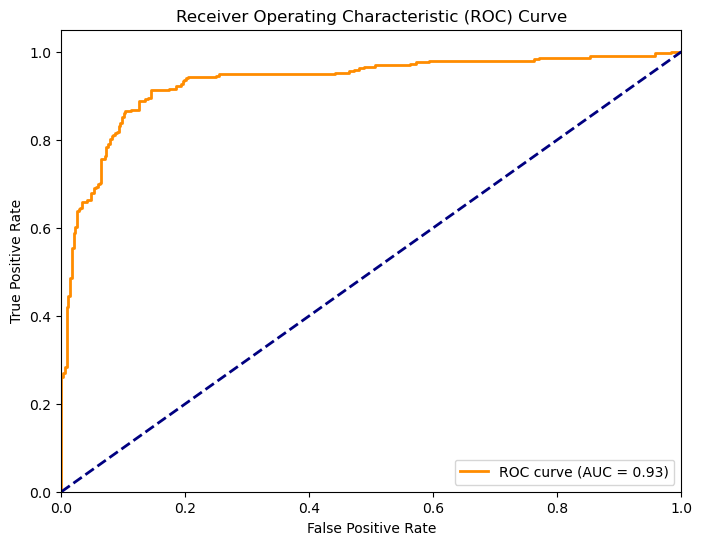

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Make predictions on the same data
predictions_prob = model1.predict()
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(cc['R1'], predictions_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Log-Loss ( for probability predictions)
$$\Large\bf \text{Log_Loss} = -\frac{1}{N}\sum_{i=1}^N y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)$$
## where N is the number of instances,   
##  $\bf \Large y_i$ is the true label (0 or 1) for the i-th instance,
## $\bf \Large \hat{y}_i $ is the predicted probability of the positive class for the i-th instance.
## Log loss can varry from 0 ( better) to infinity ( worse)


In [17]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Make predictions on the same data
predictions_prob = model1.predict()
# Calculate log loss
log_loss(cc['R1'], predictions_prob)

0.3203133416145416

## KMeans Clustering ( Centroid Method)


## The most common algorithm ( unsupervised) that is used for clustering.
## Group data points into K clusters based on similarity.
## Proposed by James MacQueen in 1967.
## Widely used for various applications, from image segmentation to customer segmentation.
## Centroids: Each cluster is represented by its centroid, which minimizes the sum of squared distances from the data points in the cluster.

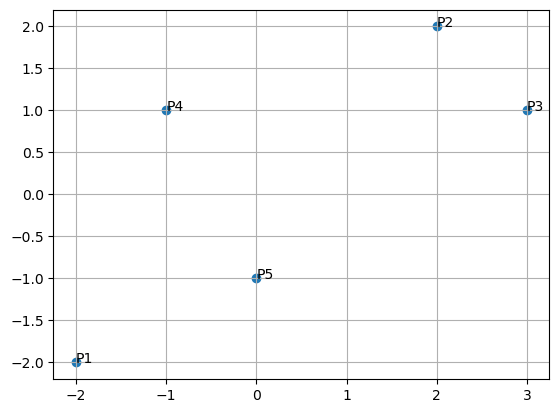

In [18]:
import numpy as np
import matplotlib.pyplot as plt
tuples = {(2,2), (-1,1), (3,1), (0,-1),(-2,-2)}
x = [x[0] for x in tuples]
y = [x[1] for x in tuples]
labels = ["P1", "P2", "P3", "P4", "P5"]
plt.scatter(x,y)
plt.grid()
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]))
plt.show()

## For simplicity, we will label points 1 through 5 by  $\large P1, P2, P3, P4$ and $\Large P5$ respectively. Clusters are A and B. At step 0 as it is given, we have custer A (-3, -1) and Cluster B (2,1) with the following assignments.

### Step 0

| Points | Coordinates |$\mathbb{R}^2$ distance from A |$\mathbb{R}^2$ distance from B  |Cluster it belongs|
| --- | --- | --- |---|---|
| P1 | (2,2) | 5.8 |1|B|
| P2 | (-1,1) | 2.82 |3|A|
| P3 | (3,1) | 6.32 |1|B|
| P4 | (0,-1) | 3 |2.82|B|
| P5 | (-2,-2) | 1.41 |5|A|

So, we have $P1, P3, P4$ in cluster B and $P2, P5$ in cluster A. We find new centroid with the points in A and B. New cluster B is the centroid of $P1, P3, P4$ which is $\left(\dfrac{5}{3}, \dfrac{2}{3}\right)$ and new cluster A is the centroid (midpoint here) of $P2, P5$ which is 
$\left( \dfrac{-3}{2}, \dfrac{-1}{2}\right)$

With these new cluster centers, we will find distances of each points again.
### Step 1

| Points | Coordinates |$\mathbb{R}^2$ distance from A |$\mathbb{R}^2$ distance from B  |Cluster it belongs|
| --- | --- | --- |---|---|
| P1 | (2,2) | 3.8 |1.37|B|
| P2 | (-1,1) | 1.33 |2.68|A|
| P3 | (3,1) | 4.22 |1.37|B|
| P4 | (0,-1) | 1.2 |2.3|A|
| P5 | (-2,-2) | 1.94 |4.5|A|

This gives us that $P2, P4, P5$ in cluster A and $P1, P3$ in cluster B. We will find new cluster one more time and see if it gives us the same clusters or not. This also determines if the kmeans algorithm converges in one step. New centroids are clusters are A$\left(-1, \dfrac{-2}{3}\right)$ and B$\left(\dfrac{5}{2}, \dfrac{3}{2}\right)$.
### Step 2

| Points | Coordinates |$\mathbb{R}^2$ distance from A |$\mathbb{R}^2$ distance from B  |Cluster it belongs|
| --- | --- | --- |---|---|
| P1 | (2,2) | 4 |0.7|B|
| P2 | (-1,1) | 1.66 |3.53|A|
| P3 | (3,1) | 4.33 |0.7|B|
| P4 | (0,-1) | 1.05 |3.53|A|
| P5 | (-2,-2) | 1.66 |5.7|A|

We see that $P2, P4, P5$ in cluster A and $P1, P3$ in cluster B. This is same result as in step 1. This proves that Kmeans algorithm converges in 1 step. The final cluster centers are given by A$\left(-1, \dfrac{-2}{3}\right)$ and B$\left(\dfrac{5}{2}, \dfrac{3}{2}\right)$. Location of new clusters are shown above in the graph.

In [ ]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as st
import matplotlib.colors as colors
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()  # for plot styling

In [19]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#  Define the names of the variables as we want them
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris = pd.read_csv(url, names=names)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [20]:
iris.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width',
       'species'],
      dtype='object')

In [22]:
newcols = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
features = iris[newcols]
features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Axes: xlabel='sepal-length', ylabel='petal-length'>

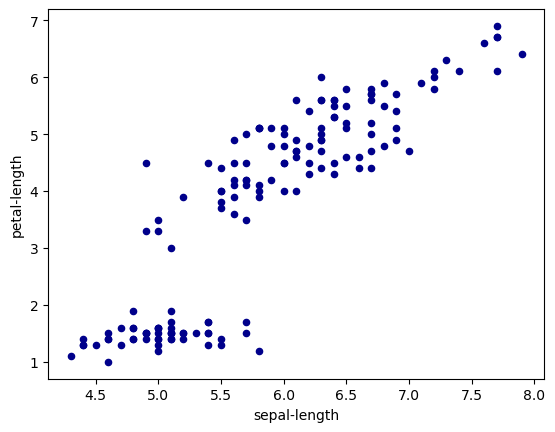

In [23]:
features.plot.scatter( x ='sepal-length', y='petal-length', c='DarkBlue')

In [24]:
X = features[['sepal-length', 'petal-length']]

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(X)
y_kmeans = kmeans.predict(X)

/Users/mann/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
print(kmeans.predict(X))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [32]:
iris['custer'] = kmeans.predict(X)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,species,custer
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [33]:
kmeans.cluster_centers_

array([[6.83902439, 5.67804878],
       [5.00784314, 1.49411765],
       [5.87413793, 4.39310345]])

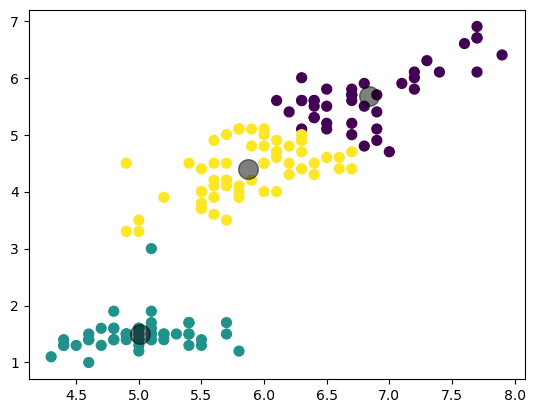

In [34]:
x=np.array(X)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

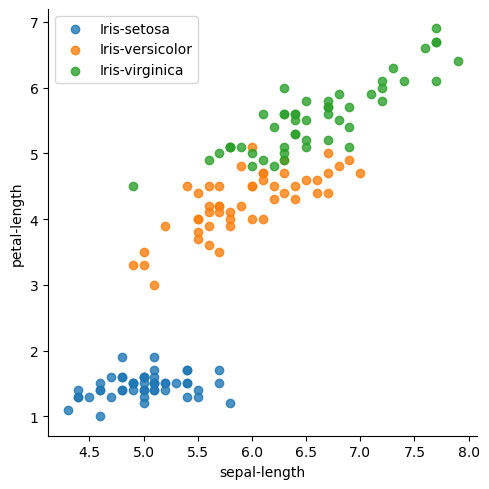

In [35]:
sns.lmplot(x='sepal-length',y='petal-length', data= iris, hue="species",
           fit_reg=False, legend=False)
plt.legend()
plt.show()

In [36]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [37]:
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(x)
y_kmeans = kmeans1.predict(x)

/Users/mann/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


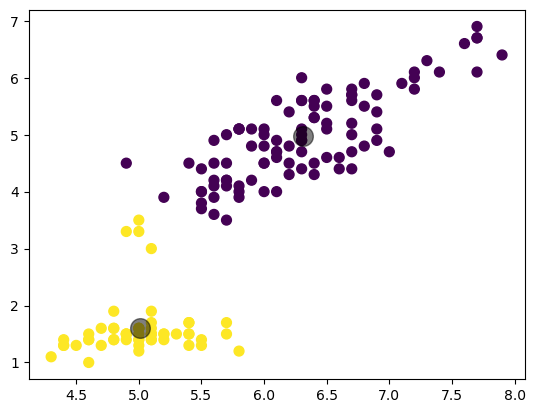

In [38]:
x=np.array(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
iris.columns

In [39]:
df= iris[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

/Users/mann/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mann/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mann/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mann/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mann/anaconda3/li

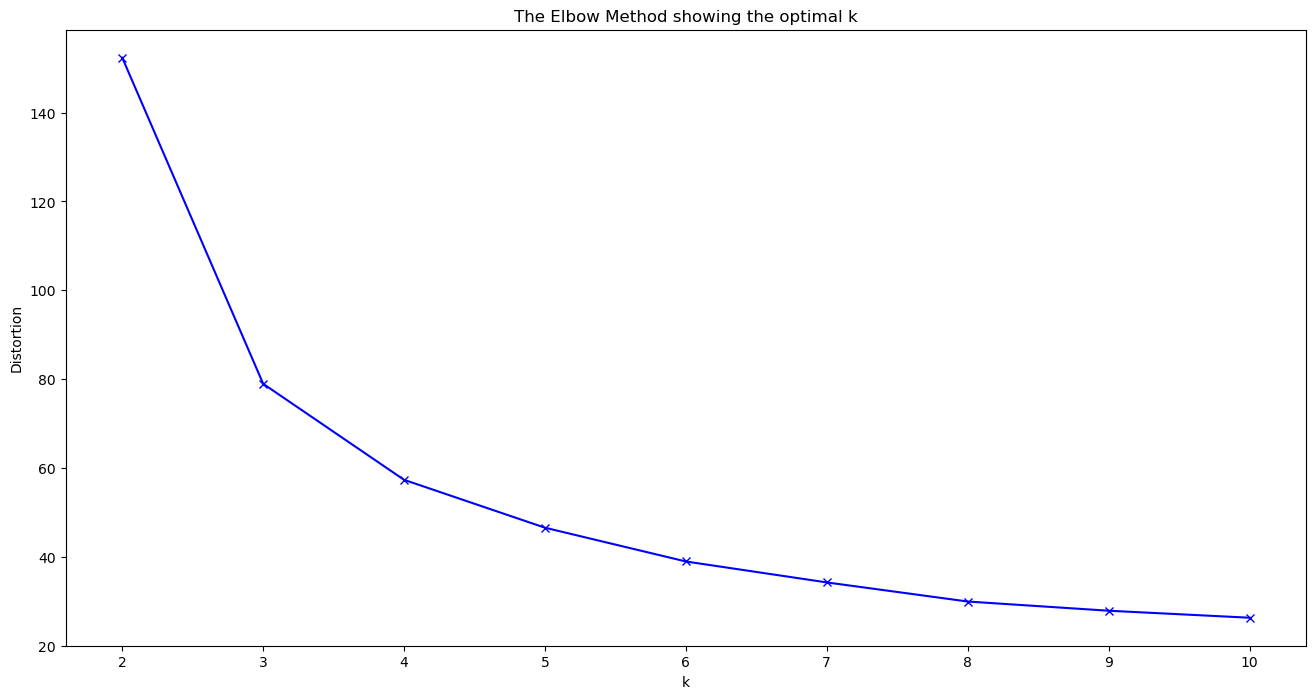

In [40]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [41]:
pd.factorize(iris.species)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object'))

In [42]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)
kmeanModel.predict(df)

/Users/mann/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

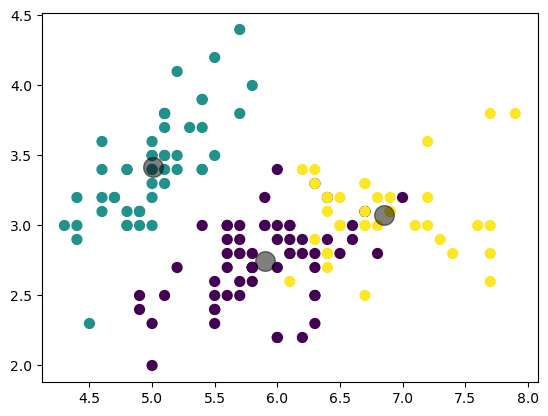

In [43]:
X=np.array(df)
plt.scatter(X[:, 0],X[:, 1], c=kmeanModel.predict(df), s=50, cmap='viridis')
centers = kmeanModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);